# K-Day User Constraint for Weather Data Generation 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import scipy
from scipy.stats import chisquare
from collections import Counter

## Load Data

In [3]:
data_raw = pd.read_csv('data/data-2010-2024.csv', delimiter=",", skiprows=3)
data_test = pd.read_csv('data/om-2025-test.csv', delimiter=",", skiprows=3 )

In [4]:
weather_columns = {
    'temperature_2m (°C)': 'temp',
    'weather_code (wmo code)': 'weather_code',
    'precipitation (mm)': 'precip',
    'cloud_cover (%)': 'cloud_cover',
    'wind_speed_10m (km/h)': 'wind_speed',
    'sunshine_duration (s)': 'sunshine',    
}

def rename_columns(df):
    df.rename(columns=weather_columns, inplace=True)
    return df

def add_time_columns(df):
    constant_year = 2000
    df['time'] = pd.to_datetime(df['time'], errors='coerce')  # Handle parsing errors
    df = df.dropna(subset=['time'])  # Drop rows with invalid dates
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df['year'] = df['time'].dt.year
    df['minute'] = df['time'].dt.minute
    df['second'] = df['time'].dt.second
    df['hour'] = df['time'].dt.hour
    df['month_day_time'] = pd.to_datetime(
        df['month'].astype(str) + '-' +
        df['day'].astype(str) + '-' +
        str(constant_year) + ' ' +
        df['hour'].astype(str).str.zfill(2) + ':' +
        df['minute'].astype(str).str.zfill(2) + ':' +
        df['second'].astype(str).str.zfill(2),
        format='%m-%d-%Y %H:%M:%S'
    )
    return df

In [5]:
data_test['time'] = pd.to_datetime(data_test['time'], format='%Y-%m-%dT%H:%M', errors='coerce')
data_raw['time'] = pd.to_datetime(data_raw['time'], format='%Y-%m-%dT%H:%M', errors='coerce')
all_data = rename_columns(data_raw)
all_data = add_time_columns(all_data)
test_data = rename_columns(data_test)
test_data = add_time_columns(test_data)

/var/folders/8s/z9nb_fz50j39t__ftkhgz5pc0000gn/T/ipykernel_71054/1286158716.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['time'].dt.month
/var/folders/8s/z9nb_fz50j39t__ftkhgz5pc0000gn/T/ipykernel_71054/1286158716.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df['time'].dt.day
/var/folders/8s/z9nb_fz50j39t__ftkhgz5pc0000gn/T/ipykernel_71054/1286158716.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [11]:
test_data

,time,sunshine,temp,precip,cloud_cover,wind_speed,month,day,year,minute,second,hour,month_day_time
0,2025-01-01 00:00:00,0.00,5.8,0.0,100.0,24.1,1,1,2025,0,0,0,2000-01-01 00:00:00
1,2025-01-01 01:00:00,0.00,6.4,0.0,100.0,24.8,1,1,2025,0,0,1,2000-01-01 01:00:00
2,2025-01-01 02:00:00,0.00,6.9,0.0,100.0,26.1,1,1,2025,0,0,2,2000-01-01 02:00:00
3,2025-01-01 03:00:00,0.00,6.9,0.0,100.0,26.8,1,1,2025,0,0,3,2000-01-01 03:00:00
4,2025-01-01 04:00:00,0.00,7.0,0.0,100.0,26.6,1,1,2025,0,0,4,2000-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2025-01-31 19:00:00,0.00,3.8,0.0,4.0,7.2,1,31,2025,0,0,19,2000-01-31 19:00:00
740,2025-01-31 20:00:00,0.00,3.2,0.0,0.0,7.3,1,31,2025,0,0,20,2000-01-31 20:00:00
741,2025-01-31 21:00:00,0.00,2.4,0.0,0.0,6.1,1,31,2025,0,0,21,2000-01-31 21:00:00
742,2025-01-31 22:00:00,0.00,1.0,0.0,0.0,3.9,1,31,2025,0,0,22,2000-01-31 22:00:00


In [5]:
test_data['temp'] = pd.to_numeric(test_data['temp'], errors='coerce')
test_data['sunshine'] = pd.to_numeric(test_data['sunshine'], errors='coerce')

/var/folders/8s/z9nb_fz50j39t__ftkhgz5pc0000gn/T/ipykernel_70298/223361395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['temp'] = pd.to_numeric(test_data['temp'], errors='coerce')
/var/folders/8s/z9nb_fz50j39t__ftkhgz5pc0000gn/T/ipykernel_70298/223361395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['sunshine'] = pd.to_numeric(test_data['sunshine'], errors='coerce')


## Categorize Weather Variables

In [ ]:
# ## Average the data
# daily_mean_df = all_data.groupby(['year', 'month', 'day']).mean().reset_index()
# daily_mean_test_df = test_data.select_dtypes(include=[np.number]).groupby(['year', 'month', 'day']).mean().reset_index()

In [29]:
# Convert relevant columns to numeric, forcing errors to NaN
for col in ['temp', 'precip', 'cloud_cover', 'wind_speed', 'sunshine']:
    test_data[col] = pd.to_numeric(test_data[col], errors='coerce')
    all_data[col] = pd.to_numeric(all_data[col], errors='coerce')

/var/folders/8s/z9nb_fz50j39t__ftkhgz5pc0000gn/T/ipykernel_71054/3028115487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[col] = pd.to_numeric(test_data[col], errors='coerce')


In [30]:
# Calculate Monthly Percentiles

def calculate_percentiles_and_categorize(df, month):
    """
    Calculates percentiles for a specific month and categorizes weather variables into low, medium, and high.
    Includes zero precipitation values in the "Low" category.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing weather data.
        month (int): The month for which to calculate percentiles (1 = January, ..., 12 = December).

    Returns:
        pd.DataFrame: A new DataFrame with additional columns for categorized weather variables.
    """
    # Filter data for the specified month
    month_data = df[df['month'] == month].copy()

    # Calculate percentiles for each weather variable
    thresholds = {}
    for variable in ['temp', 'precip', 'cloud_cover', 'wind_speed', 'sunshine']:
        variable_data = month_data[variable].dropna()

        if variable == 'precip':
            # Include zero values in the "Low" category
            low = np.percentile(variable_data, 33)
            high = np.percentile(variable_data, 66)
            thresholds[variable] = {'low': low, 'high': high}
        else:
            # Standard percentile calculation
            low = np.percentile(variable_data, 33)
            high = np.percentile(variable_data, 66)
            thresholds[variable] = {'low': low, 'high': high}

    # Categorize each variable based on the calculated thresholds
    for variable in thresholds.keys():
        low, high = thresholds[variable]['low'], thresholds[variable]['high']
        month_data[f'{variable}_category'] = month_data[variable].apply(
            lambda x: 'Low' if x <= low else 'Medium' if x < high else 'High'
        )

    return month_data

In [31]:
df_states1 = calculate_percentiles_and_categorize(all_data, 1)
df_states1_test = calculate_percentiles_and_categorize(test_data, 1)

In [32]:
# combine categories to make a weather state with temperature and precipitation
df_states1['state1'] = df_states1[['temp_category', 'precip_category']].agg('-'.join, axis=1)
df_states1_test['state1_test'] = df_states1_test[['temp_category', 'precip_category']].agg('-'.join, axis=1)

In [34]:
df_states1

,time,temp,precip,weather_code,cloud_cover,wind_speed,sunshine,month,day,year,minute,second,hour,month_day_time,temp_category,precip_category,cloud_cover_category,wind_speed_category,sunshine_category,state1
0,2010-01-01 00:00:00,-0.8,0.0,71,100,14.8,0.0,1,1,2010,0,0,0,2000-01-01 00:00:00,Low,Low,High,Medium,Low,Low-Low
1,2010-01-01 01:00:00,-0.8,0.0,3,100,15.8,0.0,1,1,2010,0,0,1,2000-01-01 01:00:00,Low,Low,High,Medium,Low,Low-Low
2,2010-01-01 02:00:00,-0.8,0.0,3,100,16.8,0.0,1,1,2010,0,0,2,2000-01-01 02:00:00,Low,Low,High,Medium,Low,Low-Low
3,2010-01-01 03:00:00,-0.9,0.0,3,100,18.1,0.0,1,1,2010,0,0,3,2000-01-01 03:00:00,Low,Low,High,High,Low,Low-Low
4,2010-01-01 04:00:00,-0.9,0.0,3,100,19.1,0.0,1,1,2010,0,0,4,2000-01-01 04:00:00,Low,Low,High,High,Low,Low-Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123451,2024-01-31 19:00:00,6.0,0.0,3,100,20.6,0.0,1,31,2024,0,0,19,2000-01-31 19:00:00,High,Low,High,High,Low,High-Low
123452,2024-01-31 20:00:00,6.0,0.0,3,100,21.7,0.0,1,31,2024,0,0,20,2000-01-31 20:00:00,High,Low,High,High,Low,High-Low
123453,2024-01-31 21:00:00,6.7,0.0,3,100,21.9,0.0,1,31,2024,0,0,21,2000-01-31 21:00:00,High,Low,High,High,Low,High-Low
123454,2024-01-31 22:00:00,7.3,0.0,3,100,23.1,0.0,1,31,2024,0,0,22,2000-01-31 22:00:00,High,Low,High,High,Low,High-Low


## Transition Matrix 

In [35]:
df = df_states1[['state1']].copy()
df_test = df_states1_test[['state1_test']].copy()
# Define the next state
df['next_state'] = df['state1'].shift(-1)
# Drop the last row since it has no next state
df = df.dropna(subset=['next_state'])
# Create a transition matrix with raw counts
transition_counts = pd.crosstab(df['state1'], df['next_state'])
# Normalize the transition counts to calculate probabilities
transition_matrix = transition_counts.div(transition_counts.sum(axis=1), axis=0)
# Fill NaN values with 0 (in case some rows have no transitions)
transition_matrix = transition_matrix.fillna(0)
print(transition_matrix)

next_state   High-High  High-Low  Low-High   Low-Low  Medium-High  Medium-Low
state1                                                                       
High-High     0.767459  0.200594  0.000000  0.000000     0.025260    0.006686
High-Low      0.102930  0.833333  0.000000  0.001188     0.004751    0.057799
Low-High      0.000000  0.000000  0.738272  0.195062     0.054321    0.012346
Low-Low       0.000302  0.000905  0.022028  0.925769     0.001509    0.049487
Medium-High   0.055072  0.027536  0.036232  0.005797     0.650725    0.224638
Medium-Low    0.004864  0.045170  0.002780  0.055247     0.058374    0.833565


## Add values for each category 

In [36]:
def values_list(df, weather_var, category, weather_cat): 
    '''Creates a list of values for each weather variable for each category'''
    cat_rows = df.loc[df[weather_cat] == category]
    val_list = cat_rows[weather_var].to_list() 
    v_list = [ '%.1f' % elem for elem in val_list ]
    return v_list

In [37]:
# get low, med, high temperatures of january for further implementation
temp_low1 = values_list(df_states1, 'temp', 'Low', 'temp_category')
temp_med1 = values_list(df_states1, 'temp', 'Medium', 'temp_category')
temp_high1 = values_list(df_states1, 'temp', 'High', 'temp_category')

# get low, med, high precipitation of january for further implementation
prec_low1 = values_list(df_states1, 'precip', 'Low', 'precip_category')
prec_med1 = values_list(df_states1, 'precip', 'Medium', 'precip_category')
prec_high1 = values_list(df_states1, 'precip', 'High', 'precip_category')

all_temp = temp_low1 + temp_med1 + temp_high1

In [38]:
from scipy.stats import norm, gamma

temp_low1 = [float(x) for x in temp_low1]
temp_med1 = [float(x) for x in temp_med1]
temp_high1 = [float(x) for x in temp_high1]

prec_low1 = [float(x) for x in prec_low1]
prec_med1 = [float(x) for x in prec_med1]
prec_high1 = [float(x) for x in prec_high1]
# Example: fit temperature distributions
temp_low_params = norm.fit(temp_low1)  # returns mean and std
temp_med_params = norm.fit(temp_med1)
temp_high_params = norm.fit(temp_high1)

## Markov Chain Implementation

In [39]:
def simulate_markov_chain(transition_matrix, states, initial_state, steps):
    '''
    Simulates a Markov Chain
    
    Args:
        transition_matrix: Pandas DataFrame with states as indices and columns
        states: List of possible states
        initial_state: Starting state for the simulation
        steps: Number of steps to simulate
        
    Returns:
        List of states in the simulated sequence
    '''

    # initialise current state
    current_state = initial_state
    
    # add current state to the list of sequences 
    state_sequence = [current_state]
    
    # generate n steps of states
    for _ in range(steps):
        # get probability for the current state
        probabilities = transition_matrix.loc[current_state].values
        # choose the next state based on the probabilities 
        next_state = np.random.choice(states, p=probabilities)
        state_sequence.append(next_state)
        current_state = next_state
    
    return state_sequence

In [40]:

def monte_carlo_markov_chain(transition_matrix, states, initial_state=None, steps=30, n_simulations=1000):
    '''
    Performs Monte Carlo simulation of a Markov Chain
    
    Args:
        transition_matrix: Pandas DataFrame with states as indices and columns
        states: List of possible states
        initial_state: Starting state (if None, will be randomly chosen based on stationary distribution)
        steps: Number of steps to simulate in each run
        n_simulations: Number of simulations to run
        
    Returns:
        Dictionary containing:
        - 'mean_counts': Average count of each state across all simulations
        - 'std_counts': Standard deviation of counts for each state
        - 'ci_lower', 'ci_upper': 95% confidence intervals for state frequencies
        - 'all_sequences': List of all simulated sequences (optional, can be removed if memory is a concern)
    '''


    # Initialize storage for all simulations
    all_sequences = []
    all_counts = {state: [] for state in states}

    # If no initial state is provided, use stationary distribution to choose one
    if initial_state is None:
        # Approximate stationary distribution by raising transition matrix to high power
        # This requires transition_matrix to be a numpy array, so convert if needed
        if isinstance(transition_matrix, pd.DataFrame):
            tm_numpy = transition_matrix.values
        else:
            tm_numpy = transition_matrix
            
        # Initialize a uniform distribution
        p = np.ones(len(states)) / len(states)
        
        # Multiply by transition matrix multiple times to approximate stationary distribution
        for _ in range(100):  # Usually 100 iterations is enough for convergence
            p = p @ tm_numpy
            
        # Choose initial state based on stationary distribution
        initial_state = np.random.choice(states, p=p)
    
    # Run n_simulations
    for _ in range(n_simulations):
        # For each simulation, potentially use a different initial state from stationary distribution
        if initial_state is None:
            sim_initial_state = np.random.choice(states, p=p)
        else:
            sim_initial_state = initial_state
            
        # Run one simulation
        sequence = simulate_markov_chain(transition_matrix, states, sim_initial_state, steps)
        all_sequences.append(sequence)
        
        # Count occurrences of each state in this simulation
        counts = Counter(sequence)
        for state in states:
            all_counts[state].append(counts.get(state, 0))
    
    # Calculate statistics
    mean_counts = {state: np.mean(counts) for state, counts in all_counts.items()}
    std_counts = {state: np.std(counts) for state, counts in all_counts.items()}
    
    # Calculate 95% confidence intervals
    ci_lower = {state: np.percentile(counts, 2.5) for state, counts in all_counts.items()}
    ci_upper = {state: np.percentile(counts, 97.5) for state, counts in all_counts.items()}
    
    return {
        'mean_counts': mean_counts,
        'std_counts': std_counts,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'all_sequences': all_sequences 
    }



In [47]:

def analyze_monte_carlo_results(mc_results, real_data, states, test_sequence=None):
    '''
    Analyzes and visualizes the results of Monte Carlo simulation
    
    Args:
        mc_results: Results from monte_carlo_markov_chain function
        real_data: Dictionary or Counter with actual observed frequencies
        states: List of possible states
        test_sequence: Optional test sequence to compare with simulated sequences
        
    Returns:
        Dictionary with analysis metrics
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import chisquare
    
    # Extract results
    mean_counts = mc_results['mean_counts']
    std_counts = mc_results['std_counts']
    ci_lower = mc_results['ci_lower']
    ci_upper = mc_results['ci_upper']
    
    # Prepare data for visualization
    simulated_means = [mean_counts[state] for state in states]
    error_bars = [std_counts[state] for state in states]
    real_counts = [real_data.get(state, 0) for state in states]

    sum_real = sum(real_counts)
    sum_sim = sum(simulated_means)
    if sum_real != sum_sim and sum_real > 0 and sum_sim > 0:
        # Scale simulated_means to match real_counts sum
        simulated_means = [x * (sum_real / sum_sim) for x in simulated_means]
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    x = np.arange(len(states))
    width = 0.35
    
    plt.bar(x - width/2, simulated_means, width, label='Simulated (Monte Carlo)', yerr=error_bars, alpha=0.7)
    plt.bar(x + width/2, real_counts, width, label='Real Data', alpha=0.7)
    
    plt.xlabel('Weather States')
    plt.ylabel('Frequency')
    plt.title('Monte Carlo Simulation vs. Real Weather States')
    plt.xticks(x, states, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    
    # Save figure
    plt.savefig('monte_carlo_analysis.png')
    
    # Calculate Chi-square statistic
    chi2_stat, p_value = chisquare(f_obs=real_counts, f_exp=simulated_means)
    
    # Calculate mean absolute error
    mae = np.mean([abs(real_counts[i] - simulated_means[i]) for i in range(len(states))])
    mse = np.mean([(real_counts[i] - simulated_means[i])**2 for i in range(len(states))])
    mape = np.mean([abs(real_counts[i] - simulated_means[i]) / real_counts[i] for i in range(len(states)) if real_counts[i] != 0])
    
    # Check if real values fall within confidence intervals
    within_ci = [ci_lower[state] <= real_data.get(state, 0) <= ci_upper[state] for state in states]
    percent_within_ci = sum(within_ci) / len(states) * 100

    # Prepare results
    results = {
        'chi2_statistic': chi2_stat,
        'p_value': p_value,
        'statistically_similar': p_value > 0.05,
        'mean_absolute_error': mae,
        'mean_squared_error': mse,
        'mean_absolute_percentage_error': mape,
        'percent_within_ci': percent_within_ci,
        'states_outside_ci': [states[i] for i in range(len(states)) if not within_ci[i]]
    }
    
    # Print summary
    print(f"Chi-square statistic: {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Distributions are statistically similar: {p_value > 0.05}")
    print(f"Mean absolute error: {mae:.2f}")
    print(f"Mean squared error: {mse:.2f}")
    print(f"Mean absolute percentage error: {mape:.2f}")
    print(f"Percentage of states within 95% CI: {percent_within_ci:.1f}%")
    print(f"States outside confidence intervals: {results['states_outside_ci']}")
    
    return results

In [48]:
# Count the frequency of each state
from collections import Counter

# List of all states
all_states = transition_matrix.index.tolist()

# Initial state (choose one from the list of states)
initial_state = np.random.choice(all_states) 

# Simulate the Markov Chain
steps = 30
state_sequence = simulate_markov_chain(transition_matrix, all_states, initial_state, steps)
state_counts = Counter(state_sequence)

state_sequence_test = []
for i in df_test['state1_test']:
    state_sequence_test.append(i)

state_counts_test = Counter(state_sequence_test)

Chi-square statistic: 453.6687
p-value: 0.0000
Distributions are statistically similar: False
Mean absolute error: 70.21
Mean squared error: 9741.65
Mean absolute percentage error: 0.53
Percentage of states within 95% CI: 0.0%
States outside confidence intervals: ['High-High', 'High-Low', 'Low-High', 'Low-Low', 'Medium-High', 'Medium-Low']


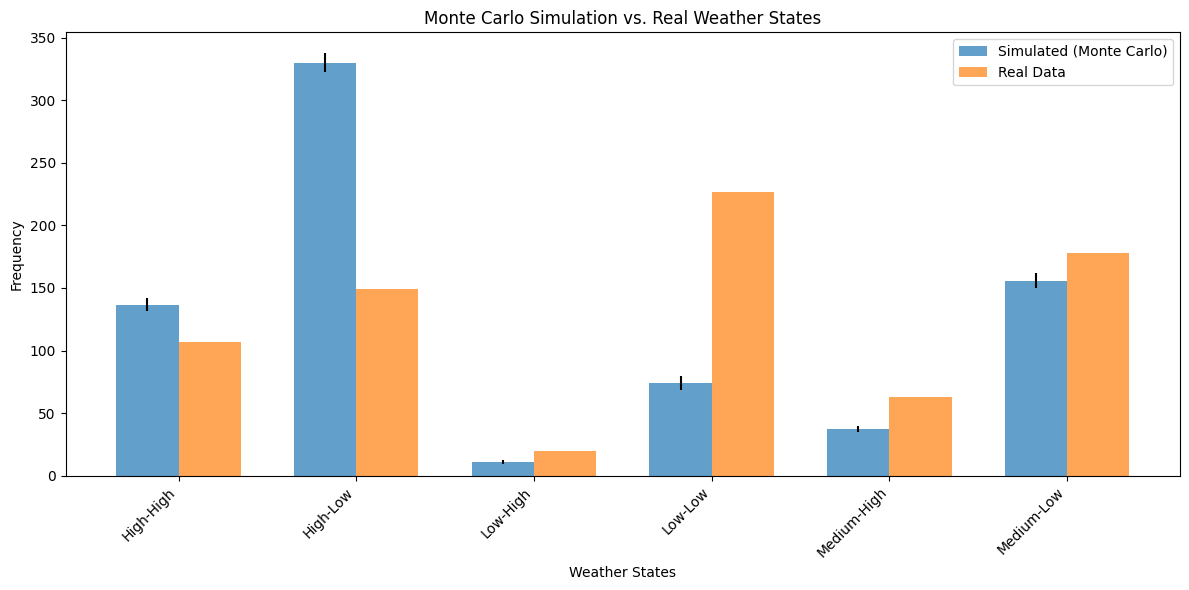

In [49]:

# Run Monte Carlo simulation
mc_results = monte_carlo_markov_chain(
    transition_matrix=transition_matrix,
    states=all_states, 
    steps=30,  # for January
    n_simulations=1000, 
)

# Analyze results
analysis = analyze_monte_carlo_results(
    mc_results=mc_results,
    real_data=state_counts_test, 
    states=all_states,
    test_sequence= state_sequence_test
)